note: performed velocyto on terminal before starting this analysis, scripts is in `/projects/robson-lab/research/endometriosis/scripts`

In [ ]:
import sys
sys.path.append("code")
from plotting.plot_settings import *
from plotting.plot_funcs import fix_aspect_scatter_with_legend, save_figure
from plotting.palettes import *
from data_prep.velocyto import *

In [1]:
import scanpy as sc
import scvelo as scv

from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
scv.logging.print_version()

Running scvelo 0.2.3 (python 3.8.8) on 2022-01-17 15:58.


In [3]:
%matplotlib inline
sc.settings.verbosity=3
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
#scv.set_figure_params('scvelo')  # for beautified visualization

In [5]:
main_dir = "/projects/robson-lab/research/endometriosis/"
sample_id = "Endometriosis-revision-3"

sub_dir = ""

In [6]:
sc.set_figure_params(dpi=150, color_map='Reds')
sns.set_style("white")

---

**Combined `.loom` adatas**

In [27]:
x = Path("/projects/robson-lab/research/endometriosis/data/processed")
looms = []
for path in sorted(x.glob("*/velocyto/*.loom")):
    libraryid = (path.stem.split("-")[0])
    adata = scv.read(path,cache=True)
    adata.var_names_make_unique()
    looms.append(adata)

... reading from cache file cache/projects-robson-lab-research-endometriosis-data-processed-EC19001-velocyto-EC19001.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... reading from cache file cache/projects-robson-lab-research-endometriosis-data-processed-EC19002-velocyto-EC19002.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... reading from cache file cache/projects-robson-lab-research-endometriosis-data-processed-EC19003-velocyto-EC19003.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... reading from cache file cache/projects-robson-lab-research-endometriosis-data-processed-EC19004-velocyto-EC19004.h5ad
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... reading from cache file cache/projects-robson-lab-research-endometriosis-data-processed-EC19005-velocyto-EC19005.h5ad
Variable names are not unique. To make them unique, call `

In [31]:
list(map(np.shape, looms))

[(7665, 33538),
 (2961, 33538),
 (3929, 33538),
 (5277, 33538),
 (5049, 33538),
 (2904, 33538),
 (5302, 33538),
 (6691, 33538),
 (3696, 33538),
 (3819, 33538),
 (3536, 33538),
 (3119, 33538),
 (3030, 33538),
 (4043, 33538),
 (5150, 33538),
 (5226, 33538),
 (2494, 33538),
 (5531, 33538),
 (3078, 33538),
 (4372, 33538),
 (2688, 33538),
 (2780, 33538),
 (5255, 33538),
 (2518, 33538),
 (468, 33538),
 (6152, 33538),
 (1607, 33538),
 (4133, 33538),
 (7801, 33538),
 (12783, 33538),
 (7371, 33538)]

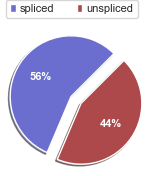

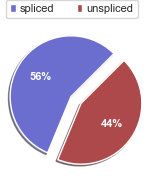

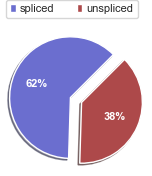

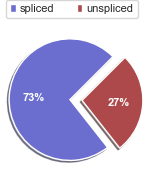

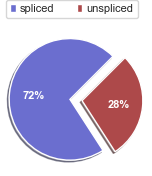

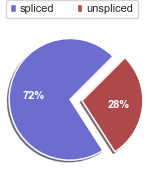

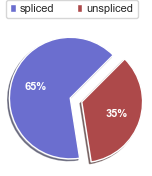

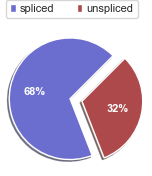

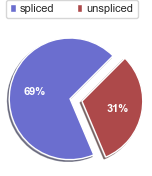

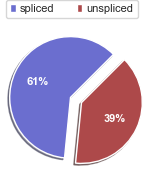

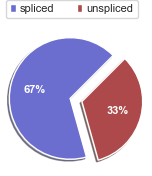

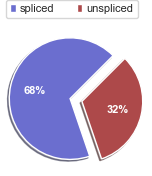

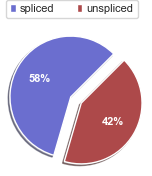

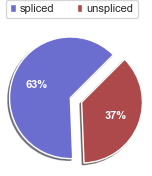

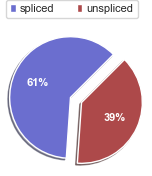

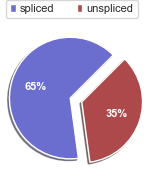

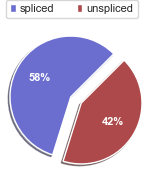

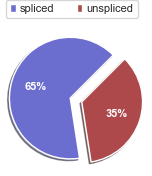

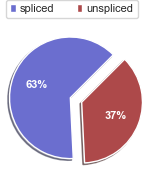

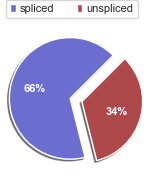

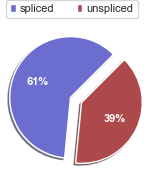

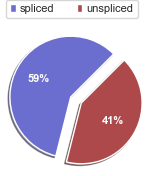

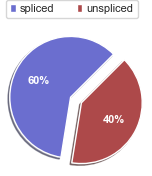

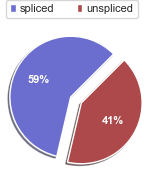

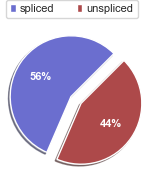

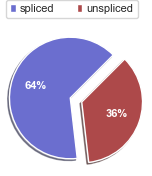

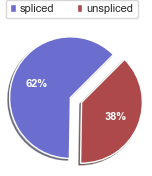

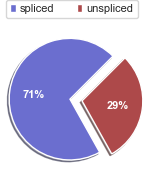

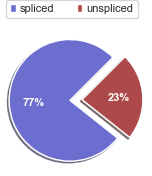

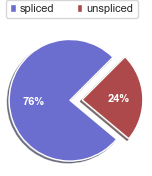

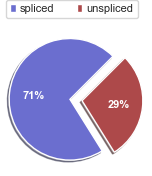

In [29]:
for adata in looms:
    scv.pl.proportions(adata)

In [30]:
len(looms)

31

In [33]:
combined = merge_adata(*looms)

In [34]:
combined

AnnData object with n_obs × n_vars = 140428 × 33538
    obs: 'Clusters', '_X', '_Y', 'library'
    var: 'Accession', 'total_counts', 'n_cells_by_counts'
    uns: 'sampleid', 'output_dir'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [35]:
#tidy up the barcodes
##create new obs_names
get_barcode = combined.obs_names.str.split(":", expand=True).to_frame().reset_index(drop=True)
get_barcode = get_barcode[1].str.split("-", expand=True).reset_index(drop=True)
get_barcode.loc[:,0]= get_barcode[0].str.replace("x","-1", case=True)
new_obs_names = get_barcode[0]+"-"+get_barcode[1]

In [36]:
#save as obs
combined.obs["new_barcodes"] = new_obs_names.values
combined.obs["old_barcodes"] = combined.obs_names

#assign new obs_names 
combined.obs_names = combined.obs["new_barcodes"]

#remove "new_barcodes" from obs
combined.obs.drop("new_barcodes", inplace=True, axis=1)

In [37]:
combined.obs

,Clusters,_X,_Y,library,old_barcodes
new_barcodes,,,,,
AAACCCACACCGTACG-1-0,5,-3.078832,19.800770,0,EC19001:AAACCCACACCGTACGx-0
AACAAAGTCATCGGGC-1-0,2,13.971176,13.594584,0,EC19001:AACAAAGTCATCGGGCx-0
AAACGCTAGCTCTGTA-1-0,0,-20.908201,0.180285,0,EC19001:AAACGCTAGCTCTGTAx-0
AAACGCTTCTATCGTT-1-0,10,5.532351,-9.070476,0,EC19001:AAACGCTTCTATCGTTx-0
AAAGTGAGTAGCTCGC-1-0,4,-10.557833,-34.541824,0,EC19001:AAAGTGAGTAGCTCGCx-0
...,...,...,...,...,...
TTTCCTCAGAAGGGAT-1-30,1,-15.915647,-31.070023,30,SC2100428_106-31-EcO:TTTCCTCAGAAGGGATx-30
TTTCAGTTCCTACGGG-1-30,0,4.165784,-38.066967,30,SC2100428_106-31-EcO:TTTCAGTTCCTACGGGx-30
TTTCCTCAGCCATTTG-1-30,6,30.973143,28.710516,30,SC2100428_106-31-EcO:TTTCCTCAGCCATTTGx-30


In [38]:
save_adata(combined, suffix="velocyto-combined")

next, we subset the adata according to our original main cell type cluster, then add the velocyto to the anndata

In [17]:
##load previous adata
mye = sc.read(f"{main_dir}/data/h5ad/{sample_id}/Myeloid/{sample_id}-mye-final-cc-20211119.h5ad")

#copy data from looms
barcodes = mye.obs_names
subset = combined[combined.obs_names.isin(barcodes)]
for key in subset.obs:
    mye.obs[key] = subset.obs[key]
for key in subset.layers:
    mye.layers[key] = subset[:, mye.var_names].layers[key]
    

#save adata
save_adata(mye, suffix="mye-before-scvelo",subdir="Myeloid")

In [1]:
#create velocity for epi dataset
epi = sc.read(f"{main_dir}/data/h5ad/{sample_id}/Epithelial/{sample_id}-final-Epi-20220119.h5ad")

#copy data from looms
barcodes = epi.obs_names
subset = combined[combined.obs_names.isin(barcodes)]
for key in subset.obs:
    epi.obs[key] = subset.obs[key]
for key in subset.layers:
    epi.layers[key] = subset[:, epi.var_names].layers[key]

#save adata
save_adata(epi, suffix="epi-before-scvelo",subdir="Epithelial")

NameError: name 'sc' is not defined

In [9]:
epi = sc.read(f"{main_dir}/data/h5ad/{sample_id}/Epithelial/{sample_id}-epi-before-scvelo-20220111.h5ad")

---
velocyto run function

---